In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv(r"C:\Users\Robin Sharma\Documents\Titanic-Dataset.csv")

C:\Users\Robin Sharma\AppData\Local\Temp\ipykernel_15076\317549449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


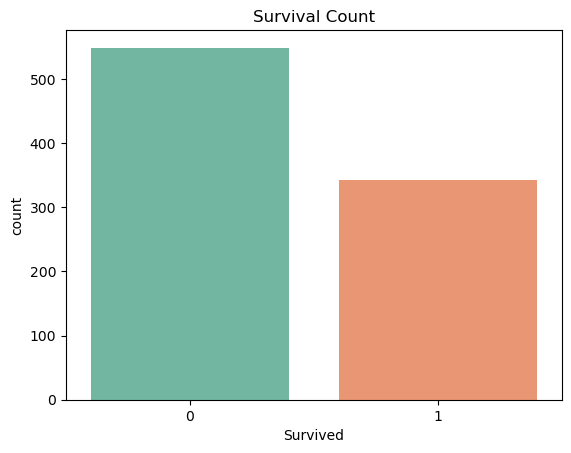

In [8]:
# Survival Count
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count")
plt.show()

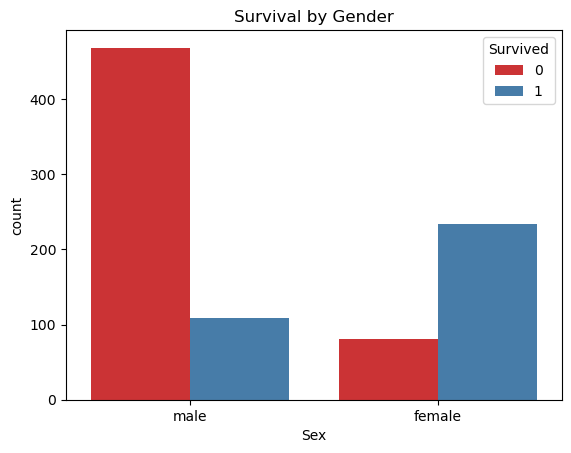

In [9]:
# Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Gender")
plt.show()

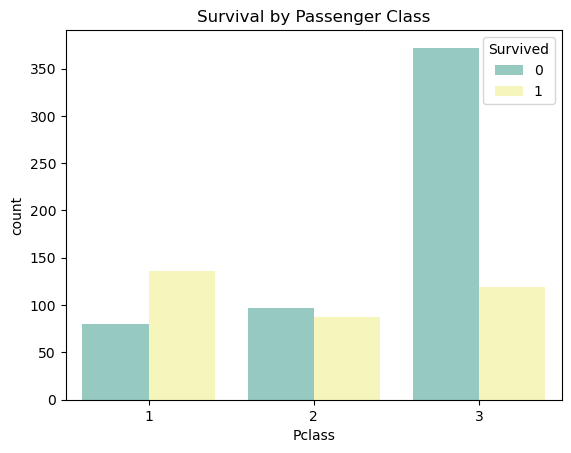

In [10]:
# Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

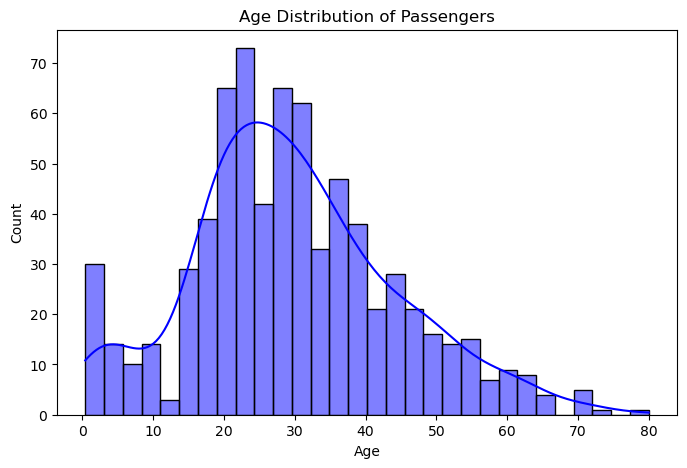

In [11]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Age Distribution of Passengers")
plt.show()

In [12]:
# ================== Data Preprocessing ==================
# Drop irrelevant columns
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [13]:
# Handle missing values
imputer_age = SimpleImputer(strategy="median")
df["Age"] = imputer_age.fit_transform(df[["Age"]]).ravel()

In [14]:
imputer_embarked = SimpleImputer(strategy="most_frequent")
df["Embarked"] = imputer_embarked.fit_transform(df[["Embarked"]]).ravel()

In [15]:
# Encode categorical variables
label_enc = LabelEncoder()
df["Sex"] = label_enc.fit_transform(df["Sex"])  # male=1, female=0
df["Embarked"] = label_enc.fit_transform(df["Embarked"])

In [16]:
# ================== Train-Test Split ==================
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# ================== Logistic Regression Model ==================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [18]:
# ================== Random Forest Model ==================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest Classifier ===
Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



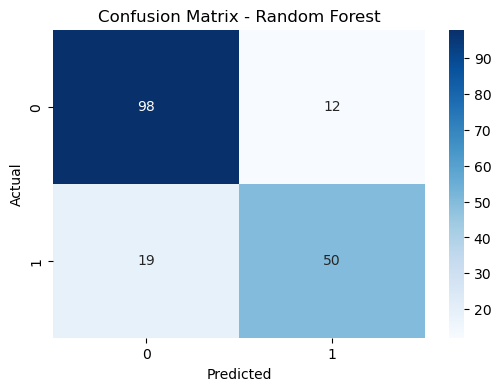

In [19]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()